In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Imported Dataset

In [2]:
ind_movies=pd.read_csv('indian movies.csv')
ind_movies

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960,-,-,-,-,hindi
1,tt1702558,Nadir Khan,1968,-,-,-,-,urdu
2,tt0493437,Apna Sapna Money Money,2006,134 min,5.3,"1,892","Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987,-,2.2,20,-,urdu
4,tt0049595,Parivar,1956,-,7.4,21,"Comedy, Drama, Family",hindi
...,...,...,...,...,...,...,...,...
50597,tt2784720,Sulagte Armaan,1984,-,-,-,Drama,hindi
50598,tt0315201,Aranya,1971,107 min,-,-,Drama,assamese
50599,tt0270221,Balayogini,1936,120 min,-,-,-,telugu
50600,tt0388697,Alajadi,1990,133 min,-,-,Drama,telugu


In [ ]:
ind_movies.isnull().sum()

## Label encoder
label encoder for column language. It gives code to that particular language

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lang_uage=le.fit_transform(ind_movies['Language'])
lang_uage

array([ 4, 18,  4, ..., 16, 16,  5])

## Array to Dataframe

In [7]:
language_coded= pd.DataFrame(lang_uage, columns = ['Language_coded'])
language_coded

,Language_coded
0,4
1,18
2,4
3,18
4,4
...,...
50597,4
50598,0
50599,16
50600,16


## Concatenating Dataframes

In [8]:
concat_ind_movies = pd.concat([ind_movies, language_coded], axis="columns")
concat_ind_movies

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language,Language_coded
0,tt0398974,Dr. Shaitan,1960,-,-,-,-,hindi,4
1,tt1702558,Nadir Khan,1968,-,-,-,-,urdu,18
2,tt0493437,Apna Sapna Money Money,2006,134 min,5.3,"1,892","Comedy, Musical, Romance",hindi,4
3,tt0273405,Aag Aur Sholay,1987,-,2.2,20,-,urdu,18
4,tt0049595,Parivar,1956,-,7.4,21,"Comedy, Drama, Family",hindi,4
...,...,...,...,...,...,...,...,...,...
50597,tt2784720,Sulagte Armaan,1984,-,-,-,Drama,hindi,4
50598,tt0315201,Aranya,1971,107 min,-,-,Drama,assamese,0
50599,tt0270221,Balayogini,1936,120 min,-,-,-,telugu,16
50600,tt0388697,Alajadi,1990,133 min,-,-,Drama,telugu,16


## Sorting Dataframe

In [10]:
concat_ind_movies.sort_values(['Rating(10)'],inplace=True,ascending=True) 
concat_ind_movies

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language,Language_coded
0,tt0398974,Dr. Shaitan,1960,-,-,-,-,hindi,4
28699,tt0214072,Samrat Chandragupta,1945,122 min,-,-,"Biography, Drama",hindi,4
28698,tt6233136,Bhoyongkor Sontrasi,2001,-,-,-,Action,bengali,1
28697,tt0234541,Punnapra Vyalar,1968,-,-,-,-,malayalam,8
28694,tt13563648,Thangam,2008,-,-,-,Drama,tamil,15
...,...,...,...,...,...,...,...,...,...
3660,tt13446782,Aqib Hakro Kay Vlogs,2018–,-,9.8,6,-,oriya,11
729,tt7890672,The Survivor,II 2016,27 min,9.9,7,Short,oriya,11
5105,tt7890672,The Survivor,II 2016,27 min,9.9,7,Short,urdu,18
12028,tt14524680,The Invisible Humans,2020,3 min,9.9,8,Short,malayalam,8


## Dealing with -

In [11]:
concat_ind_movies.drop(ind_movies[ind_movies['Rating(10)'] =='-'].index, inplace = True)
concat_ind_movies

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language,Language_coded
8409,tt1285143,Veera Prathap,1987,144 min,1.0,156,"Action, Adventure, Comedy",telugu,16
14081,tt1244614,Prema Panjaram,1991,138 min,1.0,109,"Drama, Family",telugu,16
38173,tt1228999,Prathigna,1982,136 min,1.0,142,"Comedy, Family",telugu,16
23751,tt7886848,Sadak 2,2020,133 min,1.1,"65,524","Action, Drama",hindi,4
27202,tt1228962,Bhale Ramudu,1984,147 min,1.1,164,Family,telugu,16
...,...,...,...,...,...,...,...,...,...
3660,tt13446782,Aqib Hakro Kay Vlogs,2018–,-,9.8,6,-,oriya,11
729,tt7890672,The Survivor,II 2016,27 min,9.9,7,Short,oriya,11
5105,tt7890672,The Survivor,II 2016,27 min,9.9,7,Short,urdu,18
12028,tt14524680,The Invisible Humans,2020,3 min,9.9,8,Short,malayalam,8


# Keeping what necessary

In [12]:
ind_movies1=concat_ind_movies[['Rating(10)','Language_coded']]
ind_movies1

,Rating(10),Language_coded
8409,1.0,16
14081,1.0,16
38173,1.0,16
23751,1.1,4
27202,1.1,16
...,...,...
3660,9.8,11
729,9.9,11
5105,9.9,18
12028,9.9,8


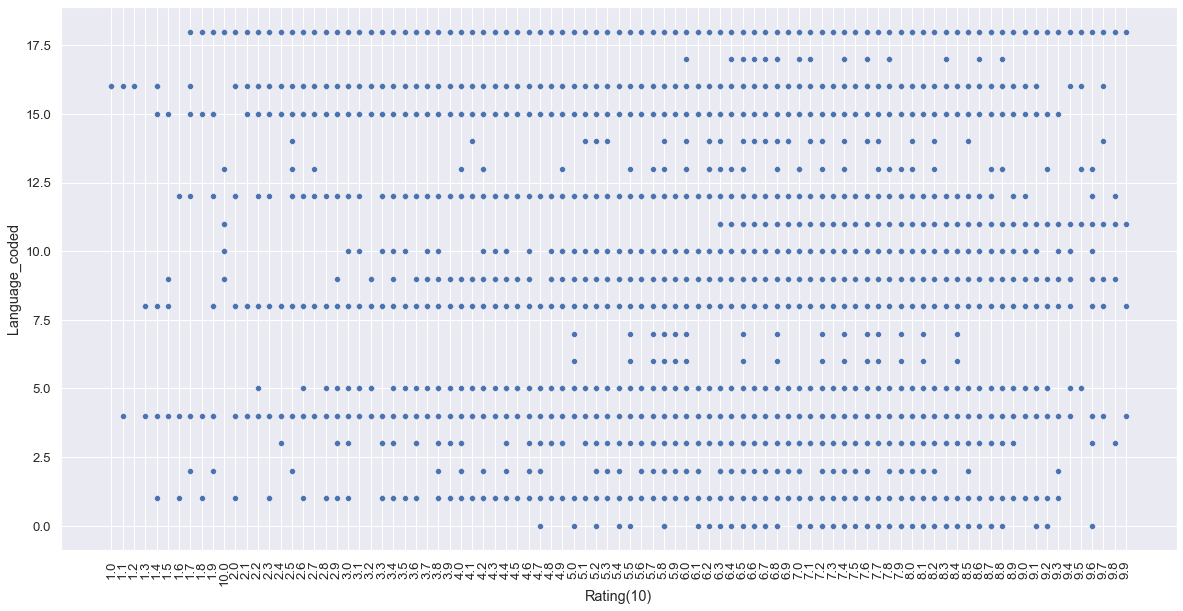

In [15]:
plt.figure(figsize=(20,10))
ax=sns.scatterplot(data=ind_movies1,x='Rating(10)',y='Language_coded')
sns.set(font_scale =1)
ax.tick_params(axis='x', rotation=90)


# Kmeans at k=5

In [16]:
from sklearn.cluster import KMeans

In [31]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(ind_movies1)
print('KMeans cluster centers :',kmeans.cluster_centers_)
print('KMeans Labels : ',kmeans.labels_)

KMeans cluster centers : [[ 6.06460883  8.19904204]
 [ 6.29151541 15.90333474]
 [ 5.99950889  4.11658092]
 [ 7.24201183 11.03648915]
 [ 6.75150157  1.01255043]]
KMeans Labels :  [1 1 1 ... 1 0 2]


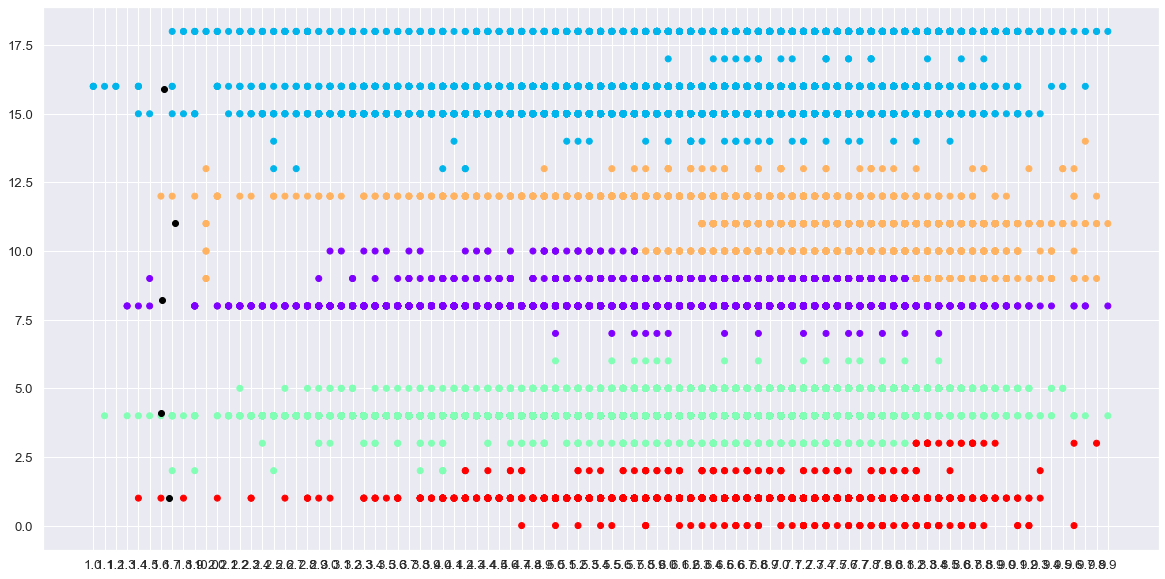

In [32]:
plt.figure(figsize=(20,10))
plt.scatter(ind_movies1['Rating(10)'],ind_movies1['Language_coded'],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
sns.set(font_scale =1.2)
ax.tick_params(axis='x', rotation=90)

# Elbow Curve

In [25]:
sse = []
k_rng = range(1,12)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(ind_movies1[['Rating(10)','Language_coded']])
    sse.append(km.inertia_)

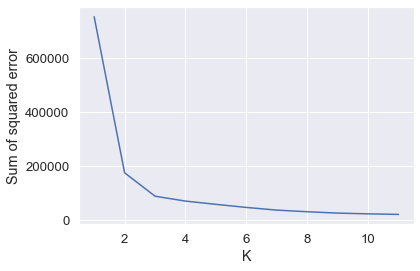

In [26]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Kmeans at k=2

In [27]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(ind_movies1)
print('KMeans cluster centers :',kmeans.cluster_centers_)
print('KMeans Labels : ',kmeans.labels_)

KMeans cluster centers : [[ 6.46487324 14.89250526]
 [ 6.15752237  4.72300758]]
KMeans Labels :  [0 0 0 ... 0 1 1]


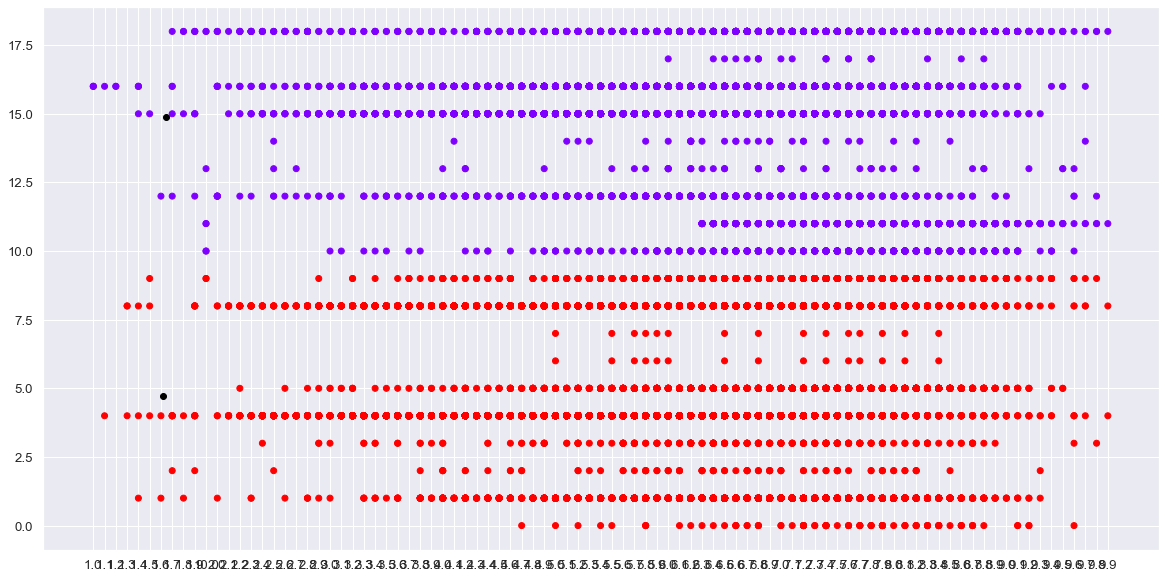

In [28]:
plt.figure(figsize=(20,10))
plt.scatter(ind_movies1['Rating(10)'],ind_movies1['Language_coded'],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
sns.set(font_scale =1.2)
ax.tick_params(axis='x', rotation=90)

# Kmeans at k=3

In [29]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(ind_movies1)
print('KMeans cluster centers :',kmeans.cluster_centers_)
print('KMeans Labels : ',kmeans.labels_)

KMeans cluster centers : [[ 6.15509598  3.47435779]
 [ 6.2974402  15.88641768]
 [ 6.47127437  9.16556407]]
KMeans Labels :  [1 1 1 ... 1 2 0]


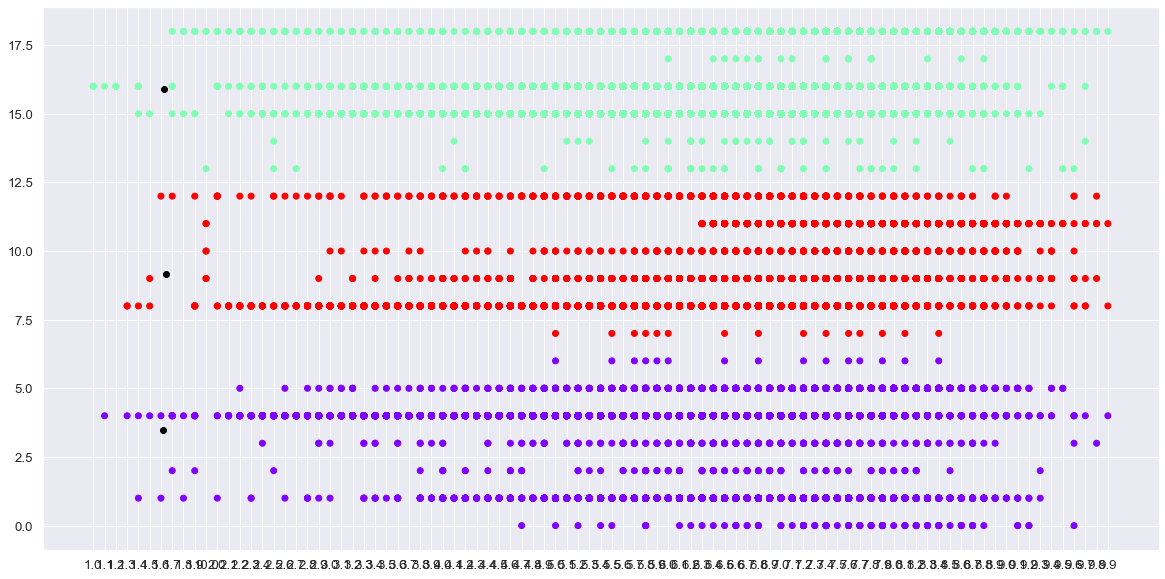

In [30]:
plt.figure(figsize=(20,10))
plt.scatter(ind_movies1['Rating(10)'],ind_movies1['Language_coded'],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
sns.set(font_scale =1.2)
ax.tick_params(axis='x', rotation=90)

# Kmeans at k=10

KMeans cluster centers : [[ 5.92703987  4.06020597]
 [ 6.96659729 15.49453694]
 [ 7.1199095   8.29082682]
 [ 7.35004651 17.98046512]
 [ 6.79354839  0.98940092]
 [ 7.48648553  4.25405787]
 [ 7.22056928 11.16326531]
 [ 4.53923182  8.1138546 ]
 [ 3.99899598  3.95833333]
 [ 4.56099865 15.54565902]]
KMeans Labels :  [9 9 9 ... 3 2 5]


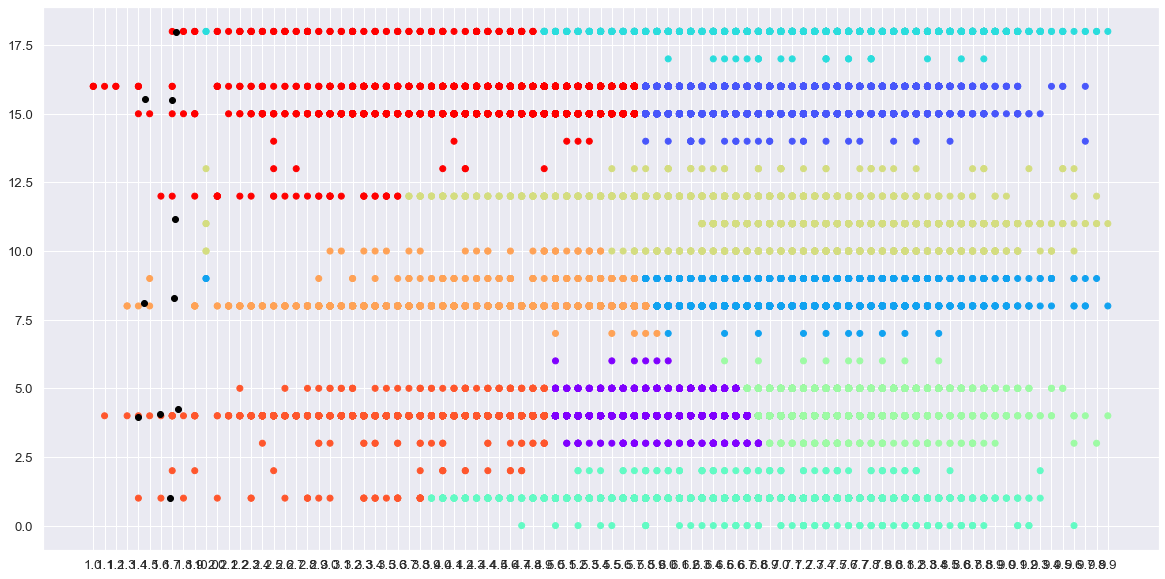

In [33]:
kmeans=KMeans(n_clusters=10)
kmeans.fit(ind_movies1)
print('KMeans cluster centers :',kmeans.cluster_centers_)
print('KMeans Labels : ',kmeans.labels_)
plt.figure(figsize=(20,10))
plt.scatter(ind_movies1['Rating(10)'],ind_movies1['Language_coded'],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
sns.set(font_scale =1.2)
ax.tick_params(axis='x', rotation=90)